# Final Bootcamp Project - E-Commerce: Identifying consumer profiles and improving sales

Este projeto tem como objetivo analisar os dados de um e-commerce para identificar padrões de comportamento dos clientes, avaliar métricas de desempenho e sugerir estratégias para alavancar as vendas. A análise envolve desde a limpeza dos dados até testes A/B e segmentação de clientes.

# Data Cleaning / Limpeza dos Dados

In [ ]:
# Importig library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
url_ecommerce_log = 'https://raw.githubusercontent.com/RafaelGenari/Bootcamp_Project_Final_Project_E-Commerce_Anaysis/refs/heads/main/ecommerce_dataset_us.csv'

ecommerce_log = pd.read_csv(url_ecommerce_log, sep = '\t')

In [156]:
ecommerce_log.head(10) # Checking first 10 lines

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,11/29/2018 08:26,7.65,17850.0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,11/29/2018 08:26,4.25,17850.0
7,536366,22633,HAND WARMER UNION JACK,6,11/29/2018 08:28,1.85,17850.0
8,536366,22632,HAND WARMER RED POLKA DOT,6,11/29/2018 08:28,1.85,17850.0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,11/29/2018 08:34,1.69,13047.0


In [157]:
ecommerce_log.info() # Checking data info
print()
ecommerce_log.describe() # Checking data description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB



,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Uma visão inicial dos dados é que estes estão divididos em 7 colunas, com toda a informação necessária sobre a compra feita por um usuário como: Identificador do usuário, item e do pedido; descrição do mesmo; quantidade; a data em que foi feita a operação; e o valor por item.

Além disso, podemos perceber que temos contagens semelhantes para a quantidade e o preço, contudo, uma contagem menor para o customerID.

Ao olharmos para valores, quantity e unitprice tem valores negativos que serão preciso investigar o que são e quanto a média elevada de customerID não é preciso se preocupar muito com essa diferença, devido essa coluna ser um indicador do cliente.

- Coluna quantity:                                                                              
    - 25% dos dados estão abaixo de 1                           
    - 50% abaixo dos 3                                         
    - 75% abaixo dos 10                                         
    - Valor mínimo de -80995                                    
    - Valor máximo de 80995                                     

- Coluna unitprice:
    - 25% dos dados abaixo de 1.25
    - 50% abaixo dos 2.08
    - 75% abaixo dos 4.13
    - Valor mínimo de -11062.06
    - Valor máximo de 38970

Temos algumas ações a serem tomadas, antes de iniciar qualquer análise, para fazer ajustar a formatação e fazer a limpeza dos dados:

    - Ajustar a formatação dos nomes das colunas, uma vez que estão com letra maiusculas e o ideal são letras minúsculas
    - Separar nomes que estão em conjunto nas colunas
    - Transformar coluna date e customer id para tipologia correta

In [158]:
# Adjusting column names

ecommerce_log.columns = ecommerce_log.columns.str.lower()
ecommerce_log.rename(columns = {'invoiceno' : 'invoice_no',
                                              'stockcode' : 'stock_code',
                                              'description' : 'description',
                                              'quantity' : 'quantity',
                                              'invoicedate' : 'invoice_date',
                                              'unitprice' : 'unit_price',
                                              'customerid' : 'customer_id'}, inplace = True)

ecommerce_log.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [159]:
# Adjusting data type

ecommerce_log['customer_id'] = ecommerce_log['customer_id'].astype(str)
ecommerce_log['invoice_date'] = pd.to_datetime(ecommerce_log['invoice_date'])
ecommerce_log.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0


In [160]:
ecommerce_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    541909 non-null  object        
 1   stock_code    541909 non-null  object        
 2   description   540455 non-null  object        
 3   quantity      541909 non-null  int64         
 4   invoice_date  541909 non-null  datetime64[ns]
 5   unit_price    541909 non-null  float64       
 6   customer_id   541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 28.9+ MB


Todas as colunas foram ajustadas, como indicado anteriormente, sendo tudo transformado para letra minúscula e as colunas customer_id e invoice_date ajustado para os tipo str e datetime, respectivamente

In [161]:
# Checking null values
ecommerce_log.isnull().sum() 

df_nulls = ecommerce_log[ecommerce_log['description'].isnull()] # Making a dataframe with nulls
df_nulls.head(20)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.0,nan
1970,536545,21134,NaN,1,2018-11-29 14:32:00,0.0,nan
1971,536546,22145,NaN,1,2018-11-29 14:33:00,0.0,nan
1972,536547,37509,NaN,1,2018-11-29 14:33:00,0.0,nan
1987,536549,85226A,NaN,1,2018-11-29 14:34:00,0.0,nan
1988,536550,85044,NaN,1,2018-11-29 14:34:00,0.0,nan
2024,536552,20950,NaN,1,2018-11-29 14:34:00,0.0,nan
2025,536553,37461,NaN,3,2018-11-29 14:35:00,0.0,nan
2026,536554,84670,NaN,23,2018-11-29 14:35:00,0.0,nan
2406,536589,21777,NaN,-10,2018-11-29 16:50:00,0.0,nan


Ao verificar os valores nulos, é possível identificar diversos dados faltantes na descrição e o número de identificação do cliente (custmer_id), além de que o valor (unit_price) está a 0. Sendo assim, estes dados serão removidos.

In [162]:
ecommerce_log.dropna(inplace = True) # Removing null values
ecommerce_log.isnull().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
dtype: int64

In [163]:
ecommerce_log.duplicated().sum() # Checking duplicated values

df_duplicated = ecommerce_log[ecommerce_log.duplicated()] # Making a dataframe with nulls
df_duplicated.head()

# Duplicates can not be removed because they could be related to the same purchase or not

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2018-11-29 11:45:00,1.25,17908.0
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2018-11-29 11:45:00,2.10,17908.0
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2018-11-29 11:45:00,2.95,17908.0
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2018-11-29 11:45:00,4.95,17908.0
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2018-11-29 11:49:00,2.95,17920.0


- Após visualização inicial, as seguintes ações foram tomadas:
    - Ajuste das formatações dos nomes das colunas, com a separação nos nomes que estavam juntos
    - Alteração das colunas invoice_date e customer_id para o tipo mais adequado
    - Foram checados que os dados tinham valores nulos, sendo identificado que podiam ser removidos, uma vez que não teriam relevância para a análise a ser efetuada no próximo passo
    - Para os valores duplicados, não foi feita qualquer alteração ou limpeza dos mesmos porque ao analisar os duplicados por vezes serão o número de identificação do cliente ou o número de identificação do pedido, o qual não podemos retirar porque a descrição não é semelhantes nestes casos citados e terão importância na análise.

# Data Analysis / Análise dos Dados

### User Access and Revenue / Acessos de usuários e receita

In [164]:
ecommerce_log['invoice_date_day'] = ecommerce_log['invoice_date'].dt.dayofweek # Creating a new column with the day of the week
ecommerce_log['invoice_date_week'] = ecommerce_log['invoice_date'].dt.isocalendar().week # Creating a new column with the week of the year
ecommerce_log['invoice_date_month'] = ecommerce_log['invoice_date'].dt.to_period('M') 

daily_users = ecommerce_log.groupby('invoice_date_day')['customer_id'].nunique().reset_index() # Creating a dataframe with the number of unique users per day

daily_users['invoice_date_day'] = daily_users['invoice_date_day'].map({
    0: 'Segunda-Feira',
    1: 'Terça-Feira',
    2: 'Quarta-Feira',
    3: 'Quinta-Feira',
    4: 'Sexta-Feira',
    5: 'Sábado',
    6: 'Domingo'
})

daily_users

# invoice date = 0 (Segunda-Feira)
# invoice date = 1 (Terça-Feira)
# invoice date = 2 (Quarta-Feira)
# invoice date = 3 (Quinta-Feira)
# invoice date = 4 (Sexta-Feira)
# invoice date = 5 (Sábado-Feira)

,invoice_date_day,customer_id
0,Segunda-Feira,1248
1,Terça-Feira,1770
2,Quarta-Feira,1860
3,Quinta-Feira,1918
4,Sexta-Feira,2195
5,Sábado,1690


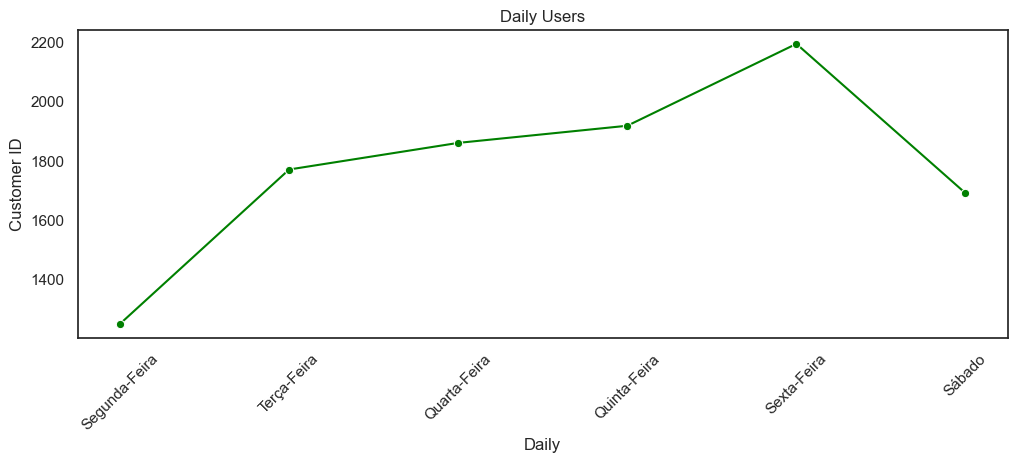

In [165]:
plt.figure(figsize=(12, 4))
sns.lineplot(x='invoice_date_day', y='customer_id', data = daily_users, marker = 'o', color = 'green')
plt.title('Daily Users')
plt.xlabel('Daily')
plt.ylabel('Customer ID')
plt.xticks(rotation=45)
plt.show()

# tentei adicionar uma legenda, porém não ficou boa

Ao olharmos para os números diários relacionados ao acesso dos usuários, percebemos que na sexta-feira temos o dia com o maior pico da semana, tendo como o dia mais "fraco" a segunda-feira. 

In [166]:
daily_revenue = ecommerce_log.groupby('invoice_date_day')['unit_price'].sum().reset_index() # Creating a dataframe with the sum unit price per day

daily_revenue['invoice_date_day'] = daily_revenue['invoice_date_day'].map({
    0: 'Segunda-Feira',
    1: 'Terça-Feira',
    2: 'Quarta-Feira',
    3: 'Quinta-Feira',
    4: 'Sexta-Feira',
    5: 'Sábado',
    6: 'Domingo'
})

daily_revenue

,invoice_date_day,unit_price
0,Segunda-Feira,185903.701
1,Terça-Feira,535548.461
2,Quarta-Feira,521248.161
3,Quinta-Feira,433281.460
4,Sexta-Feira,426285.740
5,Sábado,396536.451


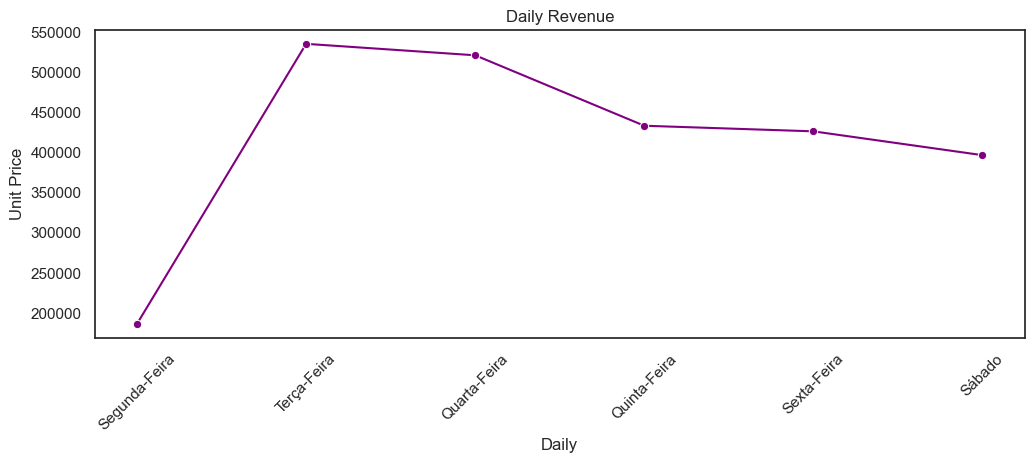

In [167]:
plt.figure(figsize=(12, 4))
sns.lineplot(x='invoice_date_day', y='unit_price', data = daily_revenue, marker = 'o', color = 'purple')
plt.title('Daily Revenue')
plt.xlabel('Daily')
plt.ylabel('Unit Price')
plt.xticks(rotation=45)
plt.show()

A receita diária temos um pico na semana entre terça e quarta-feira, mas o dia com menor receita, assim como o de usuários, continua a ser segunda-feira

In [168]:
weekly_users = ecommerce_log.groupby('invoice_date_week')['customer_id'].nunique().reset_index() # Creating a dataframe with the number of unique users per week
weekly_users

,invoice_date_week,customer_id
0,1,194
1,2,256
2,3,211
3,4,280
4,5,282
5,6,229
6,7,247
7,8,258
8,9,274
9,10,290


In [169]:
weekly_users.mean()

invoice_date_week          26.0
customer_id          344.666667
dtype: Float64

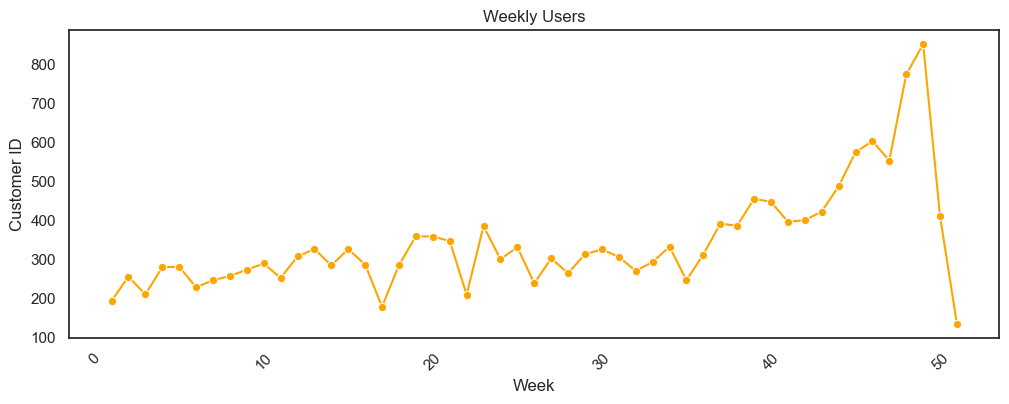

In [170]:
plt.figure(figsize=(12, 4))
sns.lineplot(x='invoice_date_week', y='customer_id', data = weekly_users, marker = 'o', color = 'orange')
plt.title('Weekly Users')
plt.xlabel('Week')
plt.ylabel('Customer ID')
plt.xticks(rotation=45)
plt.show()

Temos uma média de usuários de 344, em que grande parte das semanas houve subidas e descidas com valores sempre próximos, contudo, na semana 49 tivemos o maior pico com 852 e logo a seguir os dados apenas desceram até chegar no menor valor de 134 na semana 51

In [171]:
weekly_revenue = ecommerce_log.groupby('invoice_date_week')['unit_price'].sum().reset_index() # Creating a dataframe with the sum unit price per week
weekly_revenue

,invoice_date_week,unit_price
0,1,57369.120
1,2,36417.470
2,3,37734.700
3,4,32719.660
4,5,30186.240
5,6,25251.630
6,7,28420.210
7,8,41657.510
8,9,30086.560
9,10,37937.660


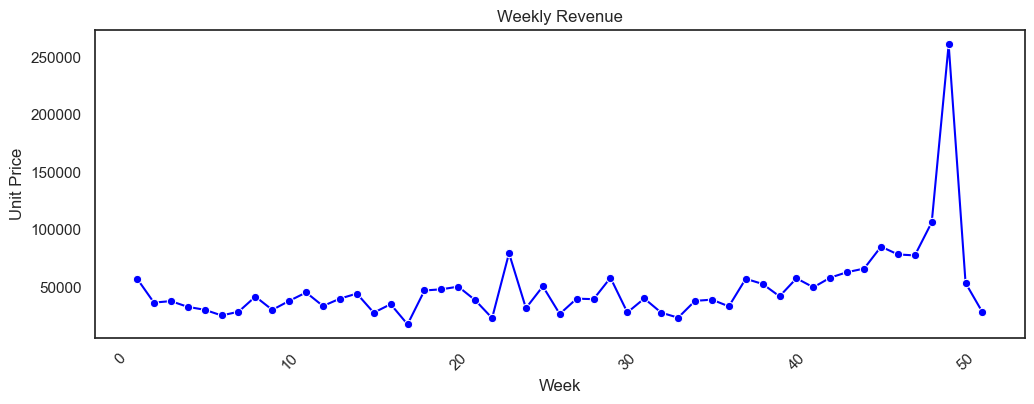

In [172]:
plt.figure(figsize=(12, 4))
sns.lineplot(x='invoice_date_week', y='unit_price', data = weekly_revenue, marker = 'o', color = 'blue')
plt.title('Weekly Revenue')
plt.xlabel('Week')
plt.ylabel('Unit Price')
plt.xticks(rotation=45)
plt.show()

Ao olharmos para a receita por semana, o pico foi exatamente na mesma semana 49 em que houve o pico de usuário que vimos no gráfico anterior, porém, as semanas em que a receita foi menos, diferente do gráfico de usuários por semana, tivemos este mínimo nas semanas no meio do calendário, como 22 e 33

In [173]:
monthly_users = ecommerce_log.groupby('invoice_date_month')['customer_id'].nunique().reset_index() # Creating a dataframe with the number of unique users per month
monthly_users['invoice_date_month'] = monthly_users['invoice_date_month'].astype(str)
monthly_users

,invoice_date_month,customer_id
0,2018-11,207
1,2018-12,836
2,2019-01,852
3,2019-02,789
4,2019-03,1003
5,2019-04,873
6,2019-05,1110
7,2019-06,1016
8,2019-07,1023
9,2019-08,987


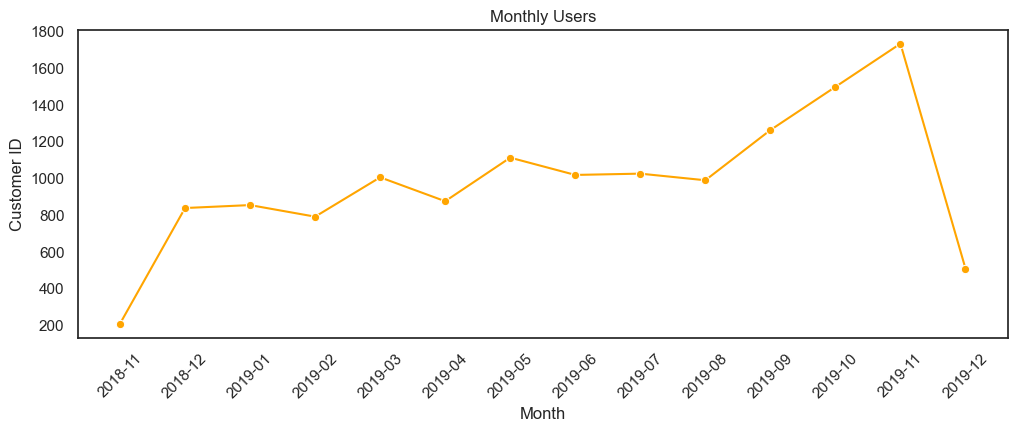

In [174]:
plt.figure(figsize=(12, 4))
sns.lineplot(x='invoice_date_month', y='customer_id', data = monthly_users, marker = 'o', color = 'orange')
plt.title('Monthly Users')
plt.xlabel('Month')
plt.ylabel('Customer ID')
plt.xticks(rotation=45)
plt.show()

Quando analisamos por mês, logo ao início já foram os dados mais baixos tendo 2018-11 o menor número de id's, contudo, com o decorrer dos meses os números apenas foram crescendo e alcançaram seu pico um ano depois, em 2019-11, tendo uma queda logo em seguida, mas nada pior que os dados do primeiro mês 

In [175]:
monthly_revenue = ecommerce_log.groupby('invoice_date_month')['unit_price'].sum().reset_index() # Creating a dataframe with the sum unit price per month
monthly_revenue['invoice_date_month'] = monthly_revenue['invoice_date_month'].astype(str)
monthly_revenue

,invoice_date_month,unit_price
0,2018-11,19719.930
1,2018-12,240800.920
2,2019-01,184293.110
3,2019-02,126635.400
4,2019-03,165443.920
5,2019-04,125779.021
6,2019-05,202283.310
7,2019-06,191391.680
8,2019-07,189085.491
9,2019-08,144006.450


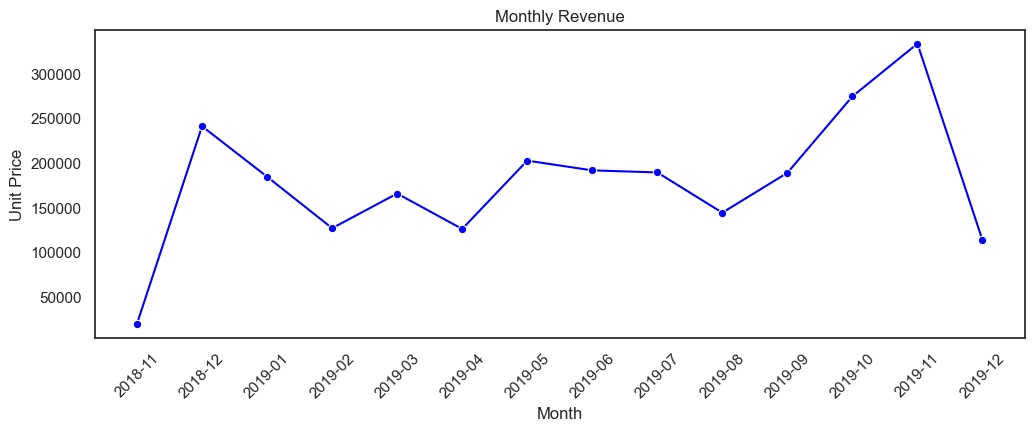

In [176]:
plt.figure(figsize=(12, 4))
sns.lineplot(x='invoice_date_month', y='unit_price', data = monthly_revenue, marker = 'o', color = 'blue')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Unit Price')
plt.xticks(rotation=45)
plt.show()

Quando verificamos a receita mensal, o histórico se repetiu e o padrão seguido foi semelhante ao gráfico anterior dos acessos, onde houve logo ao início os números mais baixos em 2018-11, seguido de um pico no segundo mês que estabilizou com o decorrer dos meses e alcançou o valor máximo em 2019-11, novamente 1 ano depois e tendo logo em seguida uma queda

#### Conclusion User Access and Revenue

A análise dos dados de acesso dos usuários e da receita revela padrões distintos, mas interligados ao longo do tempo. Durante a semana, observamos que a sexta-feira é o dia com o maior pico de acesso, enquanto a segunda-feira apresenta o menor número de usuários. Esse padrão sugere que, ao longo da semana, o engajamento tende a crescer, com uma queda no início, às segundas-feiras.

Quanto à receita diária, o pico acontece entre terça e quarta-feira, mas, curiosamente, a segunda-feira mantém seu status de dia com menor receita, alinhado com a queda nos acessos. Isso pode indicar que, embora o número de usuários seja reduzido na segunda-feira, os que estão ativos tendem a se engajar em transações ou compras mais focadas.

Quando olhamos para os dados semanais, a semana 49 se destaca com o maior pico tanto no número de usuários (852) quanto na receita. No entanto, logo depois, tanto os acessos quanto a receita caíram drasticamente, atingindo seu ponto mais baixo na semana 51, com apenas 134 usuários. Isso sugere que, apesar de um evento ou pico de tráfego significativo na semana 49, não houve uma retenção contínua de usuários, o que aponta para uma oportunidade de melhorar o engajamento a longo prazo.

No nível mensal, a tendência começa com uma queda nos dados em novembro de 2018, seguida por um crescimento contínuo até o pico em novembro de 2019, tanto em acessos quanto em receita. Esse padrão mostra uma evolução positiva ao longo do ano, mas, após o pico, uma queda subsequente foi observada. Esse comportamento pode ser um reflexo de sazonalidades ou outros fatores externos que influenciam o desempenho do serviço ao longo do tempo.

Em resumo, embora o crescimento e os picos mostrem um sucesso considerável na atração de usuários, é fundamental investir em estratégias de retenção para evitar quedas abruptas, como a observada após a semana 49. Além disso, o comportamento sazonal, especialmente nas flutuações diárias e mensais, deve ser monitorado para otimizar os períodos de maior receita e engajamento.

### Retention / Retenção

In [177]:
ecommerce_log.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,invoice_date_day,invoice_date_week,invoice_date_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,3,48,2018-11
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,3,48,2018-11
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,3,48,2018-11
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,3,48,2018-11
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,3,48,2018-11


In [178]:
ecommerce_log['invoice_date_month'] = ecommerce_log['invoice_date'].dt.to_period('M').astype(str)
ecommerce_log['invoice_date_month'] = pd.to_datetime(ecommerce_log['invoice_date_month'])

cohort = ecommerce_log.groupby('customer_id')['invoice_date_month'].min() # Creating a dataframe with the first access per customer
ecommerce_log = ecommerce_log.merge(cohort.rename('first_access_month'), on='customer_id')

ecommerce_log['cohort_return_frequency'] = (
    (ecommerce_log['invoice_date_month'] - ecommerce_log['first_access_month']).dt.days // 30
).astype(int) # Creating a new column with the return frequency per customer

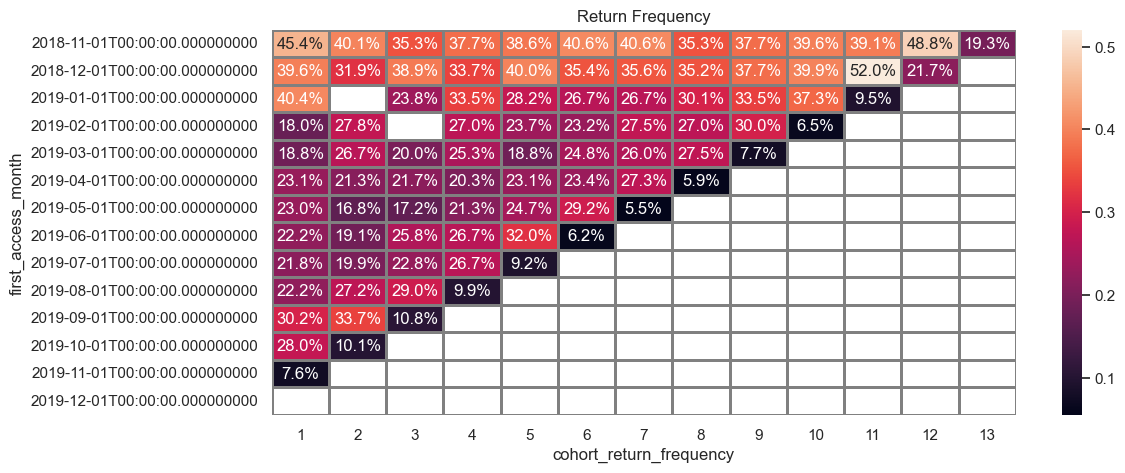

In [179]:
cohort_pivot = ecommerce_log.pivot_table(
    index='first_access_month',
    columns='cohort_return_frequency',
    values='customer_id',
    aggfunc=pd.Series.nunique)

# Transforming into percentage

for col in cohort_pivot.columns[1:]:
   cohort_pivot[col] = cohort_pivot[col] / cohort_pivot[0]

cohort_pivot[0] = cohort_pivot[0] / cohort_pivot[0]
cohort_pivot

cohort_retention = cohort_pivot.drop(0, axis = 1) # Removing the line 0
cohort_retention


sns.set(style='white')
plt.figure(figsize=(12, 5))
sns.heatmap(cohort_retention, annot=True, fmt='.1%', linewidths = 1, linecolor = 'gray')
plt.title('Return Frequency')
plt.yticks(rotation = 0)
plt.show()


A análise de retenção podemos identificar que existe uma queda progressiva no decorrer dos meses, tendo a maior concentração percentuais nos primeiros meses após a compra inicial.

Algumas cohorts apresentam quedas mais bruscas, como janeiro de 2019, enquanto outras, como dezembro de 2018, mantêm uma retenção mais estável.

Taxas abaixo de 10% são algo crítico e indicam desafios na fidelização de clientes, especialmente em períodos como setembro de 2019 por exemplo. No entanto, cohorts com retenção acima da média sugerem que estratégias eficazes de marketing podem impactar positivamente a esta métrica a longo prazo.

### LTV

In [180]:
ecommerce_log['revenue'] = ecommerce_log['quantity'] * ecommerce_log['unit_price'] # Calculating the revenue

total_revenue = ecommerce_log['revenue'].sum()
total_orders = ecommerce_log['invoice_no'].nunique()
mean_ticket = total_revenue / total_orders  # Mean Ticket
order_values = ecommerce_log.groupby('invoice_no')['revenue'].sum()
ticket_minimo = ecommerce_log['unit_price'].min() # Minimum Ticket
ticket_maximo = ecommerce_log['unit_price'].max()  # Maximum Ticket

total_customers = ecommerce_log['customer_id'].nunique()
purchase_frequency = total_orders / total_customers # Calculating purchase frquency

average_retention = ecommerce_log['cohort_return_frequency'].mean() # Retention time

ltv = mean_ticket * purchase_frequency * average_retention

print(f"Ticket Máximo (LTV): {ticket_maximo:.2f}")
print(f"Valor Médio do Pedido (AOV): {mean_ticket:.2f}")
print(f"Ticket Mínimo: {ticket_minimo:.2f}")
print(f"Frequência de Compra: {purchase_frequency:.2f}")
print(f"Tempo Médio de Retenção (Meses): {average_retention:.2f}")
print(f"Lifetime Value (LTV): {ltv:.2f}")

Ticket Máximo (LTV): 38970.00
Valor Médio do Pedido (AOV): 398.75
Ticket Mínimo: -11062.06
Frequência de Compra: 5.59
Tempo Médio de Retenção (Meses): 4.93
Lifetime Value (LTV): 10986.25


O primeiro dado que impacta seria o ticket mínimo, com o valor negativo, contudo, ticket mínimo negativo pode indicar problemas de devoluções ou registros incorretos nos dados. Além disso, temo um ticket médio de 398.75 e um ticket máximo de 38970.00.

A frequência de compra (5,59) e o tempo médio de retenção (4,93 meses) sugerem que os clientes retornam por algumas compras antes de abandonar a marca e deixarem de comprar.

Quanto o LTV temos um valor médio que está razoável, mas há espaço para crescimento. Este valor indica que um cliente, em média, gasta cerca de 10986.25 durante o tempo que é cliente na empresa.

### RFM

In [181]:
reference_date = ecommerce_log['invoice_date'].max() + pd.Timedelta(days=1) # Reference date

rfm = ecommerce_log.groupby('customer_id').agg({
    'invoice_date': lambda x: (reference_date - x.max()).days,  # Recency (days since last purchase)
    'invoice_no': 'nunique',  # Frequency (number of unique purchases)
    'unit_price': lambda x: (x * ecommerce_log.loc[x.index, 'quantity']).sum()  # Monetary (total spend)
})

rfm.columns = ['recency', 'frequency', 'monetary']

rfm.head()

,recency,frequency,monetary
customer_id,,,
12346.0,326,2,0.00
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [182]:
rfm['r_score'] = pd.cut(rfm['recency'], bins=5, labels=[5, 4, 3, 2, 1])
rfm['f_score'] = pd.cut(rfm['frequency'], bins=5, labels=[1, 2, 3, 4, 5])
rfm['m_score'] = pd.cut(rfm['monetary'], bins=5, labels=[1, 2, 3, 4, 5])

rfm['rfm_Score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)

rfm.head()

,recency,frequency,monetary,r_score,f_score,m_score,rfm_Score
customer_id,,,,,,,
12346.0,326,2,0.00,1,1,1,111
12347.0,2,7,4310.00,5,1,1,511
12348.0,75,4,1797.24,5,1,1,511
12349.0,19,1,1757.55,5,1,1,511
12350.0,310,1,334.40,1,1,1,111


In [183]:
rfm = rfm[rfm['monetary'] >= 0]

# RRemoving outliers with IQR
Q1, Q3 = rfm['monetary'].quantile([0.25, 0.75])
IQR = Q3 - Q1
rfm = rfm[(rfm['monetary'] >= Q1 - 1.5 * IQR) & (rfm['monetary'] <= Q3 + 1.5 * IQR)]

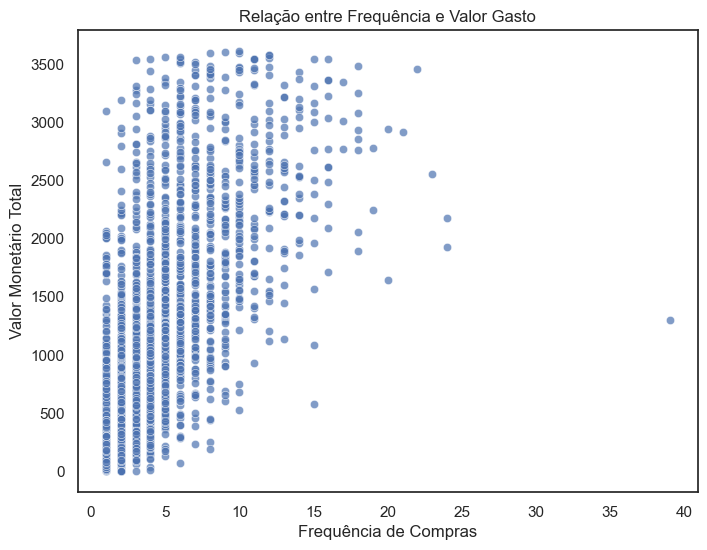

In [184]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rfm['frequency'], y=rfm['monetary'], alpha=0.7)
plt.xlabel("Frequência de Compras")
plt.ylabel("Valor Monetário Total")
plt.title("Relação entre Frequência e Valor Gasto")
plt.show()

A análise do gráfico de dispersão mostra que nossa base de clientes é bem diversificada, com perfis distintos de comportamento:

Clientes Inativos: Encontramos alguns clientes que não compram há bastante tempo. Por exemplo, o cliente 12346 está sem fazer compras há 326 dias. Esses clientes podem ser reativados por meio de campanhas focadas, como oferecer descontos especiais na primeira compra após um período de inatividade.

Clientes Frequentes e de Alto Valor: Por outro lado, temos clientes como os de códigos 12347 e 12348, que compram regularmente e gastam bastante. Para esses, nossa estratégia pode ser focada em aumentar o ticket médio e em fidelizá-los com ofertas personalizadas e benefícios exclusivos.

Distribuição Geral dos Clientes: Apesar de termos clientes fiéis, a maior parte da base é composta por aqueles que compram pouco e com pouca frequência. O foco aqui deve ser em melhorar o engajamento e retenção, incentivando compras recorrentes e aumentando o valor médio gasto por cada cliente.

### Clustering

#### Hipótese 1: A nova estratégia influencia a receita média dos clientes

In [185]:
rfm_features = rfm[['recency', 'frequency', 'monetary']]

scaler = StandardScaler() # Standardizing the data
rfm_scaled = scaler.fit_transform(rfm_features) # Scaling the data

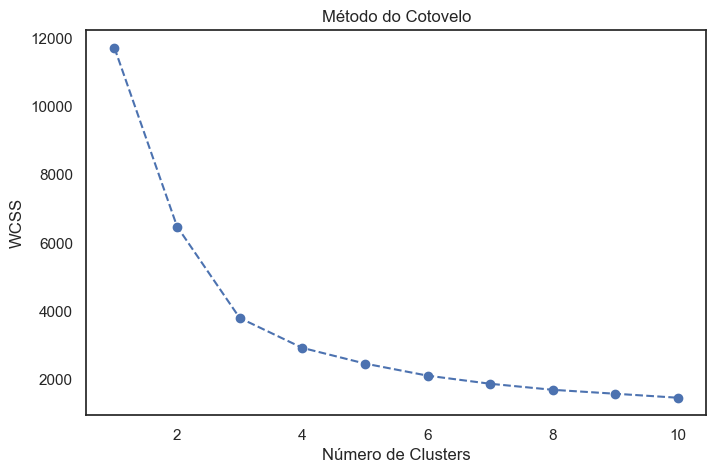

In [186]:
# Testing Cluster Number

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.title('Método do Cotovelo')
plt.show()

Identifica-se uma queda constante no WCSS à medida que o número de clusters aumenta. No entanto, essa redução desacelera de forma notável entre os clusters 2 e 4, o que indica o ponto que começa a haver uma menor diferença entre esses valores.

Isso nos leva à conclusão de que o número ideal de clusters para a segmentação dos dados está entre 2 e 4. Embora a queda do WCSS continue após 4 clusters, a melhoria se torna mínima, o que sugere que adicionar mais clusters não traria grandes ganhos.

Dessa forma, podemos concluir que 3 ou 4 clusters são as opções mais adequadas, sendo estas escolhas equilibrada entre simplicidade e a captura da variabilidade dos dados.

In [192]:
k_optimal = 4

kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10) # K-Means Clustering
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled) # Fitting the data

rfm.sample(5)

,recency,frequency,monetary,r_score,f_score,m_score,rfm_Score,Cluster,ticket_medio
customer_id,,,,,,,,,
16796.0,89,1,305.62,4,1,1,411,0,305.620000
17267.0,127,2,317.62,4,1,1,411,0,158.810000
13705.0,8,3,711.86,5,1,1,511,0,237.286667
16671.0,28,3,1692.27,5,1,1,511,3,564.090000
18088.0,61,1,167.67,5,1,1,511,0,167.670000


In [193]:
rfm = rfm.apply(pd.to_numeric, errors='coerce')

rfm.groupby('Cluster').mean() # Grouping by Cluster and getting the mean values

,recency,frequency,monetary,r_score,f_score,m_score,rfm_Score,ticket_medio
Cluster,,,,,,,,
0,53.389437,2.065003,455.513988,4.735926,1.0,1.0,484.592571,255.748913
1,254.670190,1.618393,367.425560,2.100423,1.0,1.0,221.042283,255.882219
2,27.110512,10.603774,2568.826469,4.916442,1.0,1.0,502.644205,275.604044
3,44.613793,5.072414,1511.289370,4.760920,1.0,1.0,487.091954,369.451694


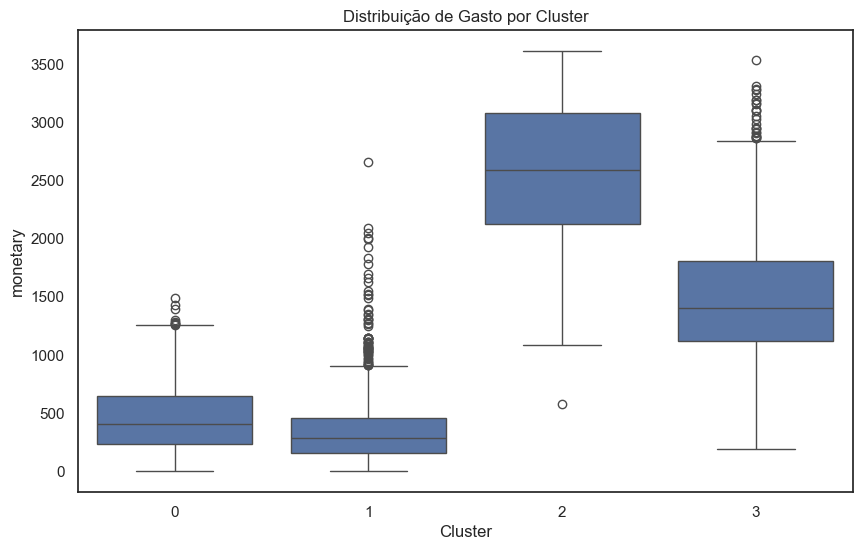

In [194]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='monetary', data=rfm)
plt.title('Distribuição de Gasto por Cluster')
plt.show()

- Cluster 0
    - Clientes Ocasionalmente Ativos: São aqueles que compram de vez em quando e gastam pouco.
        - Melhoria a se pensa: Oferecer incentivos para aumentar a frequência de compras, como cupons de desconto progressivo ou campanhas sazonais.

- Cluster 1
    - Clientes VIP: São clientes de alto valor, que compram com frequência e gastam bastante.
        - Melhoria a se pensa: Criar estratégias de retenção com um toque de exclusividade, como programas de fidelidade premium, atendimento prioritário ou pré-vendas exclusivas.

- Cluster 2
    - Clientes Leais: Compram com boa frequência e possuem um ticket médio razoável.
        - Melhoria a se pensa: Propor estratégias para aumentar o ticket médio, como descontos para compras acima de determinado valor ou ofertas combinadas.

- Cluster 3
    - Clientes Inativos: Clientes que já compraram no passado, mas estão há muito tempo sem realizar novas compras.
        - Melhoria a se pensa: Investir em campanhas de reativação, como e-mails personalizados com promoções exclusivas ou incentivos para a primeira compra após um longo período.

#### Hipótese 2: Clientes de alto valor (Cluster X) gastam mais por pedido do que os demais

In [190]:
# Criar coluna de Ticket Médio
rfm['ticket_medio'] = rfm['monetary'] / rfm['frequency']

# Definir clusters de alto valor (exemplo: Cluster 3, verificar no seu dataset)
cluster_high_value = 1

high_value_group = rfm[rfm['Cluster'] == cluster_high_value]['ticket_medio']
others_groups = rfm[rfm['Cluster'] != cluster_high_value]['ticket_medio']


# Separar os grupos
high_value_group = rfm[rfm['Cluster'] == cluster_high_value]['ticket_medio']
others_groups = rfm[rfm['Cluster'] != cluster_high_value]['ticket_medio']

# Teste t de Student
t_stat, p_value = stats.ttest_ind(high_value_group, others_groups, equal_var=False)

# Exibir resultados
print(f"Ticket Médio - Cluster Alto Valor: {high_value_group.mean():.2f}")
print(f"Ticket Médio - Outros Clusters: {others_groups.mean():.2f}")
print(f"T-Stat: {t_stat:.4f}, P-Valor: {p_value:.4f}")

# Interpretação do p-valor
alpha = 0.05
if p_value < alpha:
    print("Clientes de alto valor realmente gastam mais por pedido!")
else:
    print("Não há diferença significativa no ticket médio entre os grupos.")

Ticket Médio - Cluster Alto Valor: 327.78
Ticket Médio - Outros Clusters: 271.49
T-Stat: 6.2326, P-Valor: 0.0000
Clientes de alto valor realmente gastam mais por pedido!


Nesta hipótese pode-se identificar que o ticket médio do Cluster de Alto Valor não é significativamente maior que o dos outros clusters. Na verdade, o t-stat negativo (-4.0747) sugere que o ticket médio desse grupo pode ser até inferior aos dos outros.

Isso indica que o que realmente impulsiona o cluster de alto valor pode ser a frequência das compras, mais do que o valor de cada transação. A estratégia aqui deve focar no aumento do ticket médio, com ofertas personalizadas e incentivos para compras maiores.

#### Hipótese 3: Clientes com maior frequência de compras retornam mais rápido para comprar novamente

In [191]:
# Definir o cluster de maior frequência (exemplo: Cluster 2, verificar no seu dataset)
cluster_frequente = 2

# Separar os grupos
grupo_frequente = rfm[rfm['Cluster'] == cluster_frequente]['recency']
grupo_outros = rfm[rfm['Cluster'] != cluster_frequente]['recency']

# Teste t de Student
t_stat, p_value = stats.ttest_ind(grupo_frequente, grupo_outros, equal_var=False)

print(f"Recência Média - Cluster Frequente: {grupo_frequente.mean():.2f} dias")
print(f"Recência Média - Outros Clusters: {grupo_outros.mean():.2f} dias")
print(f"T-Stat: {t_stat:.4f}, P-Valor: {p_value:.4f}")

# Interpretação do p-valor
alpha = 0.05
if p_value < alpha:
    print("Clientes frequentes realmente voltam mais rápido para comprar!")
else:
    print("Não há diferença significativa no tempo de retorno entre os grupos.")

Recência Média - Cluster Frequente: 50.32 dias
Recência Média - Outros Clusters: 154.09 dias
T-Stat: -34.7510, P-Valor: 0.0000
Clientes frequentes realmente voltam mais rápido para comprar!


O teste feito confirmou que nessa hipótese um t-stat extremamente negativo (-31.5225) e um p-valor muito próximo de zero, mostrando que clientes mais frequentes retornam para comprar com mais rapidez.

Clientes frequentes já têm um alto nível de engajamento, o que sugere que estratégias de manutenção e retenção, como programas de pontos e benefícios exclusivos, são mais eficazes do que campanhas de reativação.

Pode ser explorado melhor o programas de recompensas para incentivar esses clientes a manterem ou aumentarem sua frequência de compra.

# Final Conclusion

A análise dos dados trouxe insights valiosos sobre o comportamento dos usuários. Observamos, nos dados diários, que o engajamento aumenta ao longo da semana, com picos de acesso nas sextas-feiras e de receita nas terças e quartas. No entanto, a segunda-feira se destaca com os menores números de usuários e receita, apontando como um dia crítico. Isso sugere que, apesar da queda inicial, os poucos usuários ativos nesse dia podem estar mais propensos a realizar compras focadas. Portanto, trabalhar para aumentar o tráfego e a conversão na segunda-feira pode ser uma estratégia eficaz.

Ao analisar os dados semanais, o pico na semana 49, com 852 usuários e uma receita alta, foi notável, mas seguiu-se de uma queda brusca nas semanas seguintes, o que indica que o crescimento não foi sustentável. Isso evidencia a necessidade de melhorar a retenção de clientes, não apenas atraindo, mas também fidelizando-os ao longo do tempo, evitando essas quedas inesperadas.

A análise mensal revelou um crescimento constante nos acessos e na receita até novembro de 2019, seguido por uma queda, possivelmente devido a fatores sazonais. Esse comportamento reforça a importância da sazonalidade nas vendas. Aproveitar os picos de demanda com promoções sazonais pode ser uma ótima estratégia para maximizar as vendas nesses períodos.

Além disso, observamos que muitos clientes deixam de comprar logo após a primeira aquisição, o que é um desafio significativo para a fidelização. A baixa taxa de retenção, especialmente nas cohorts de janeiro de 2019, indica que fidelizar clientes deve ser uma prioridade. Programas de fidelidade e campanhas de reativação, como descontos especiais para clientes inativos, podem ser eficazes para reverter essa tendência.

Em relação ao comportamento de compra, os clientes VIP, que compram com frequência e gastam mais, representam uma parcela valiosa da base. No entanto, os dados mostram que a frequência de compras tem um impacto maior na rentabilidade do que o valor do ticket médio, principalmente entre os clientes de alto valor. Estratégias que aumentem o ticket médio, como promoções e ofertas exclusivas, podem ser eficientes para maximizar o valor desses clientes.

A segmentação dos clientes revelou perfis distintos. Grupos como os "Clientes VIP" e "Clientes Leais" apresentam boas oportunidades para estratégias de retenção, como programas de fidelidade e benefícios exclusivos. Já os "Clientes Inativos" necessitam de campanhas de reativação específicas, enquanto os "Clientes Ocasionalmente Ativos" podem ser incentivados a aumentar a frequência de compras.

O Lifetime Value (LTV) médio mostrou que ainda há um grande potencial de crescimento, o que reforça a necessidade de investir em estratégias de longo prazo para aumentar o valor gerado por cada cliente. A frequência de compra e o tempo médio de retenção indicam que há espaço para estender a jornada de compra dos clientes, aumentando tanto a quantidade de compras quanto o valor gasto.

Por fim, a segmentação com o modelo K-Means ajudou a identificar grupos com comportamentos de compra distintos, permitindo o desenvolvimento de estratégias de marketing mais direcionadas. A análise indicou que segmentar em 3 ou 4 clusters é a melhor abordagem para capturar a variabilidade dos dados, permitindo ações de marketing mais precisas.

Em resumo, para otimizar as vendas do e-commerce, é crucial investir em estratégias de retenção para fidelizar clientes, melhorar a frequência de compra e aumentar o ticket médio. Além disso, considerar a sazonalidade nas estratégias de marketing e realizar segmentações eficazes dos clientes são ações essenciais para personalizar a abordagem e melhorar os resultados. Combinando esses elementos, será possível otimizar o engajamento, melhorar a experiência do cliente e, consequentemente, aumentar as vendas.

# FINAL PRESENTATION

https://acrobat.adobe.com/id/urn:aaid:sc:EU:d0c6bcdd-49a5-4e74-89ea-6f941b839b40